In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
import statsmodels.formula.api as smf
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

## EDA

In [2]:
co_e= pd.read_csv('co2_emissions (1).csv')

In [3]:
co_e

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [4]:
co_e.cylinders.unique()

array([ 4,  6, 12,  8, 10,  3,  5, 16], dtype=int64)

In [5]:
co_e.vehicle_class.unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [6]:
co_e.make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [7]:
co_e.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
co_e.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [9]:
co_e.drop_duplicates(inplace=True)

## Visualizations

<Axes: >

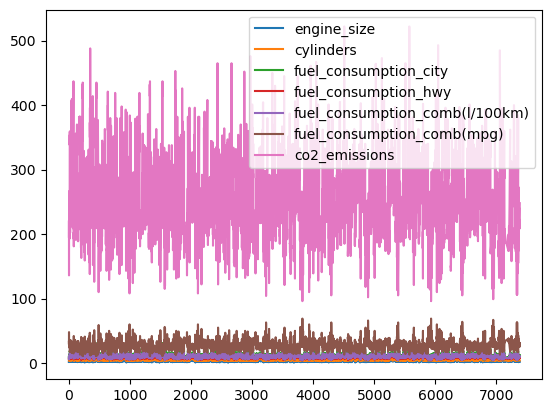

In [10]:
co_e.plot()

<Axes: >

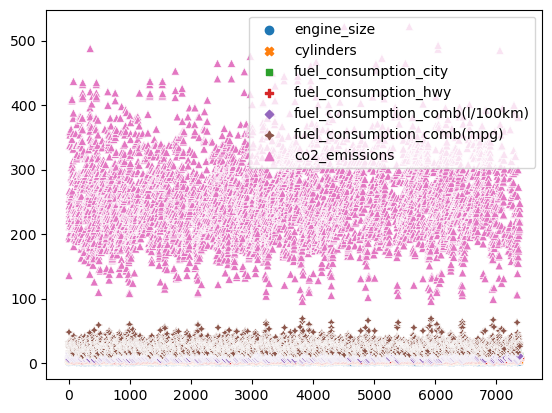

In [11]:
sns.scatterplot(data=co_e)

In [12]:
co_e.corr()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
engine_size,1.000000,0.928796,0.834325,0.766700,0.820183,-0.764060,0.854999
cylinders,0.928796,1.000000,0.801180,0.717321,0.780932,-0.724347,0.834697
fuel_consumption_city,0.834325,0.801180,1.000000,0.950733,0.994040,-0.927901,0.918528
fuel_consumption_hwy,0.766700,0.717321,0.950733,1.000000,0.978578,-0.892238,0.883153
fuel_consumption_comb(l/100km),0.820183,0.780932,0.994040,0.978578,1.000000,-0.926110,0.916611
fuel_consumption_comb(mpg),-0.764060,-0.724347,-0.927901,-0.892238,-0.926110,1.000000,-0.906839
co2_emissions,0.854999,0.834697,0.918528,0.883153,0.916611,-0.906839,1.000000


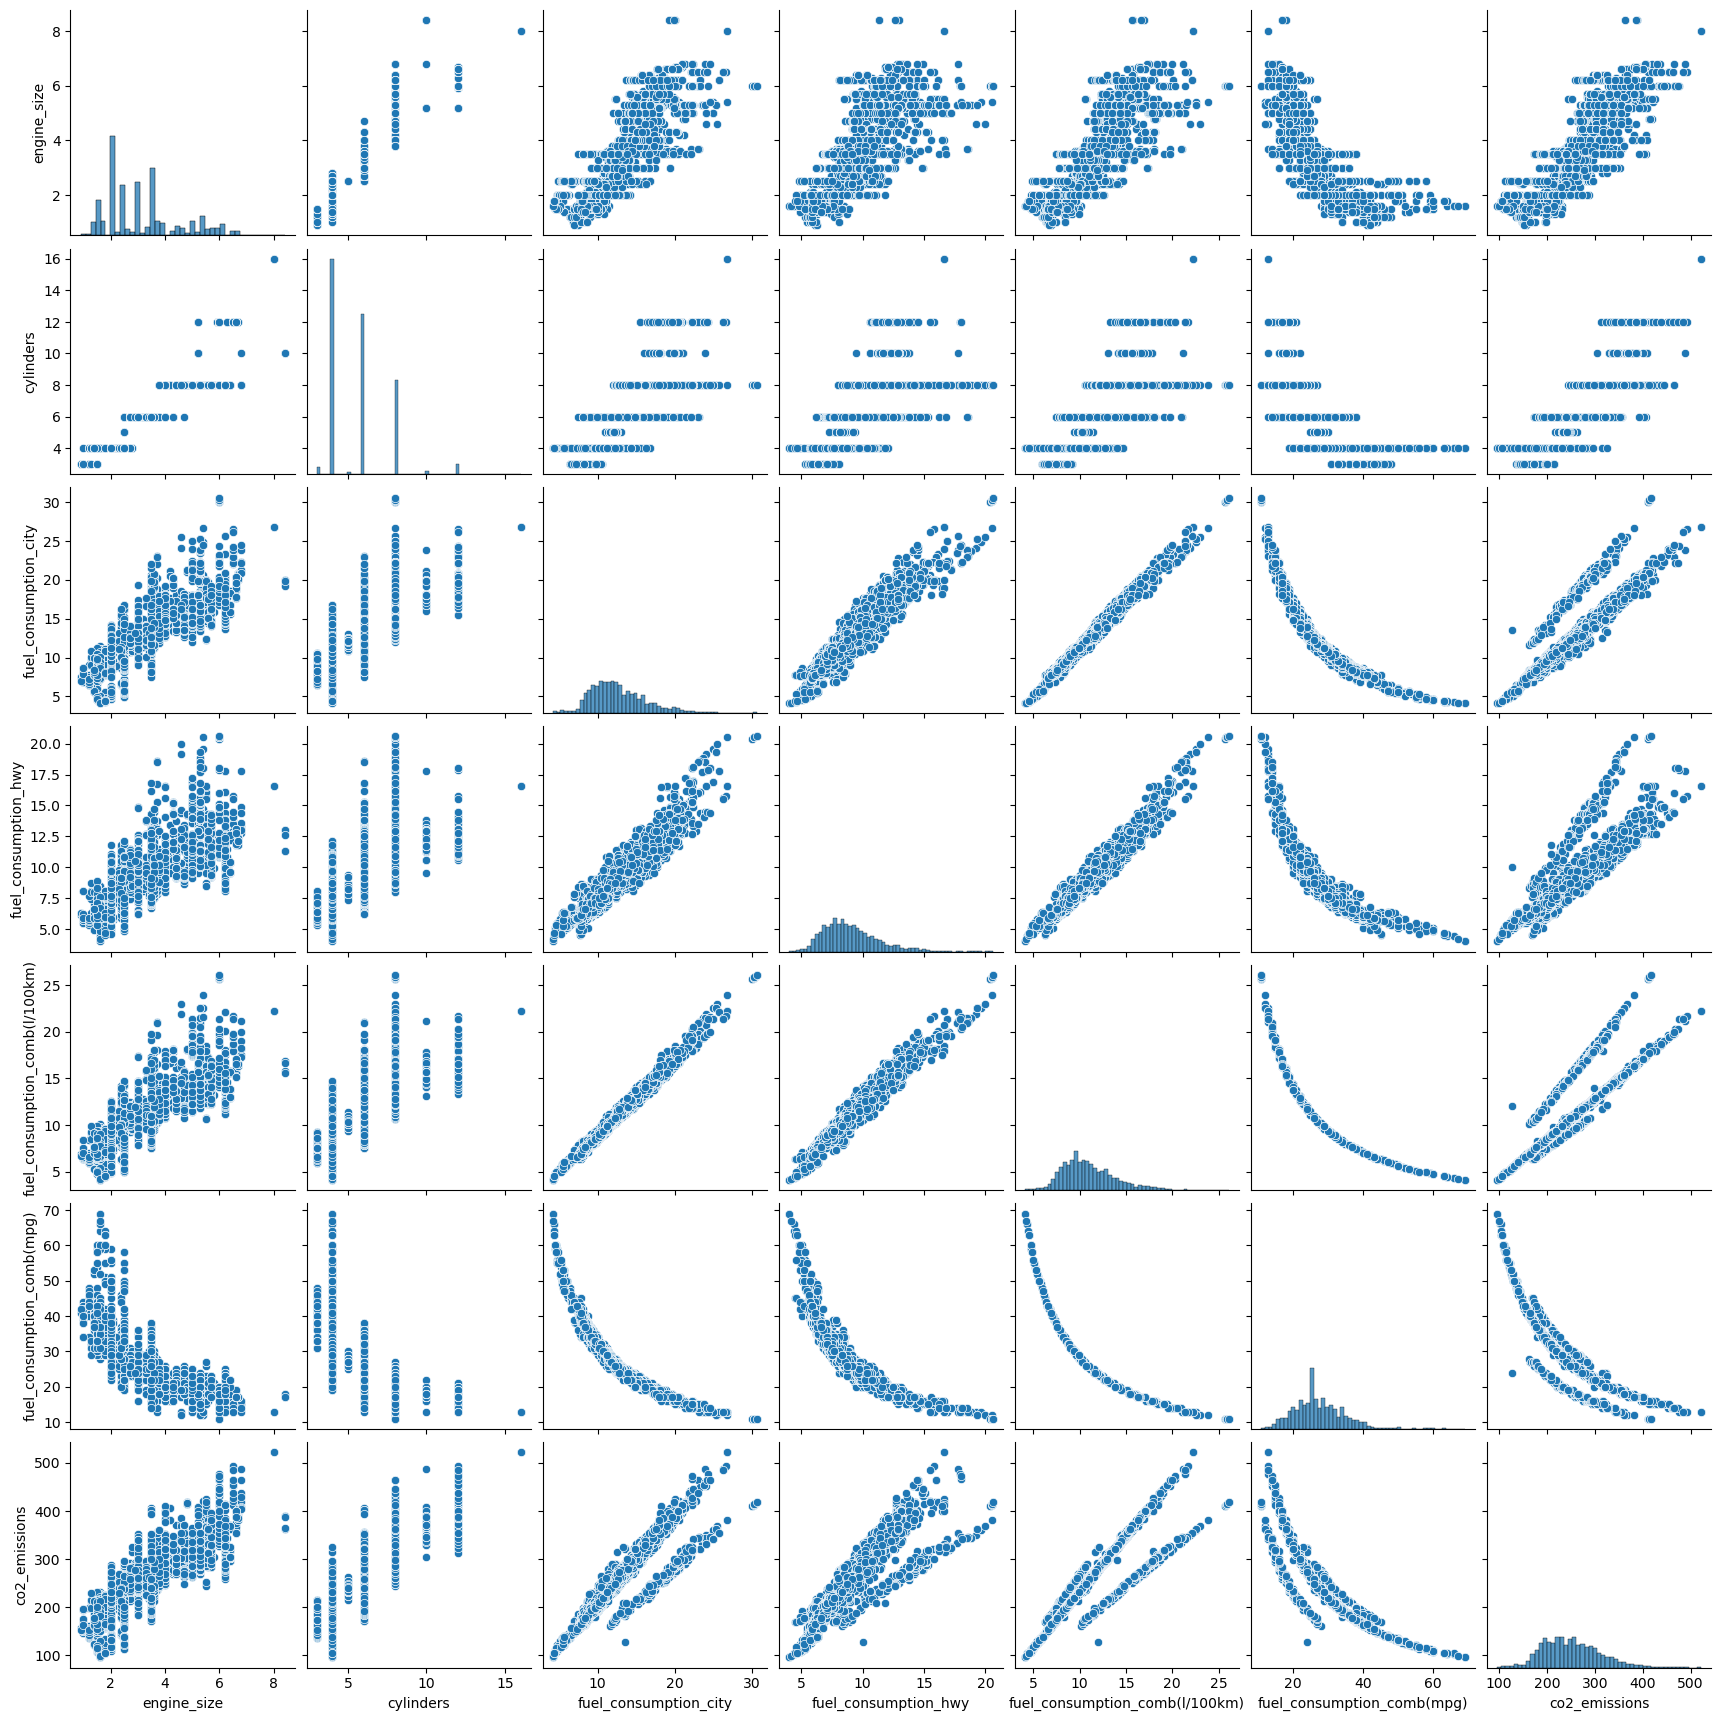

In [13]:
sns.pairplot(co_e)

<Axes: ylabel='co2_emissions'>

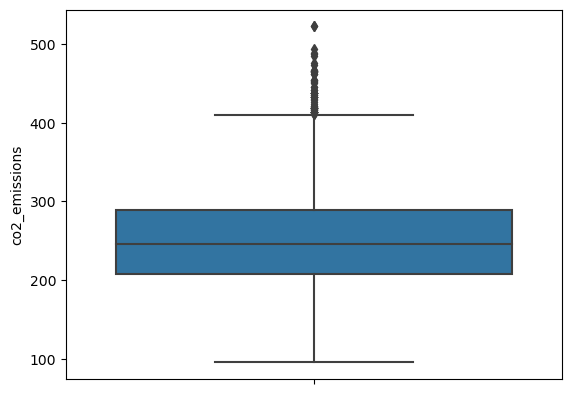

In [14]:
sns.boxplot(y='co2_emissions',data=co_e,order=co_e['make'].value_counts().index)

<Axes: xlabel='engine_size', ylabel='co2_emissions'>

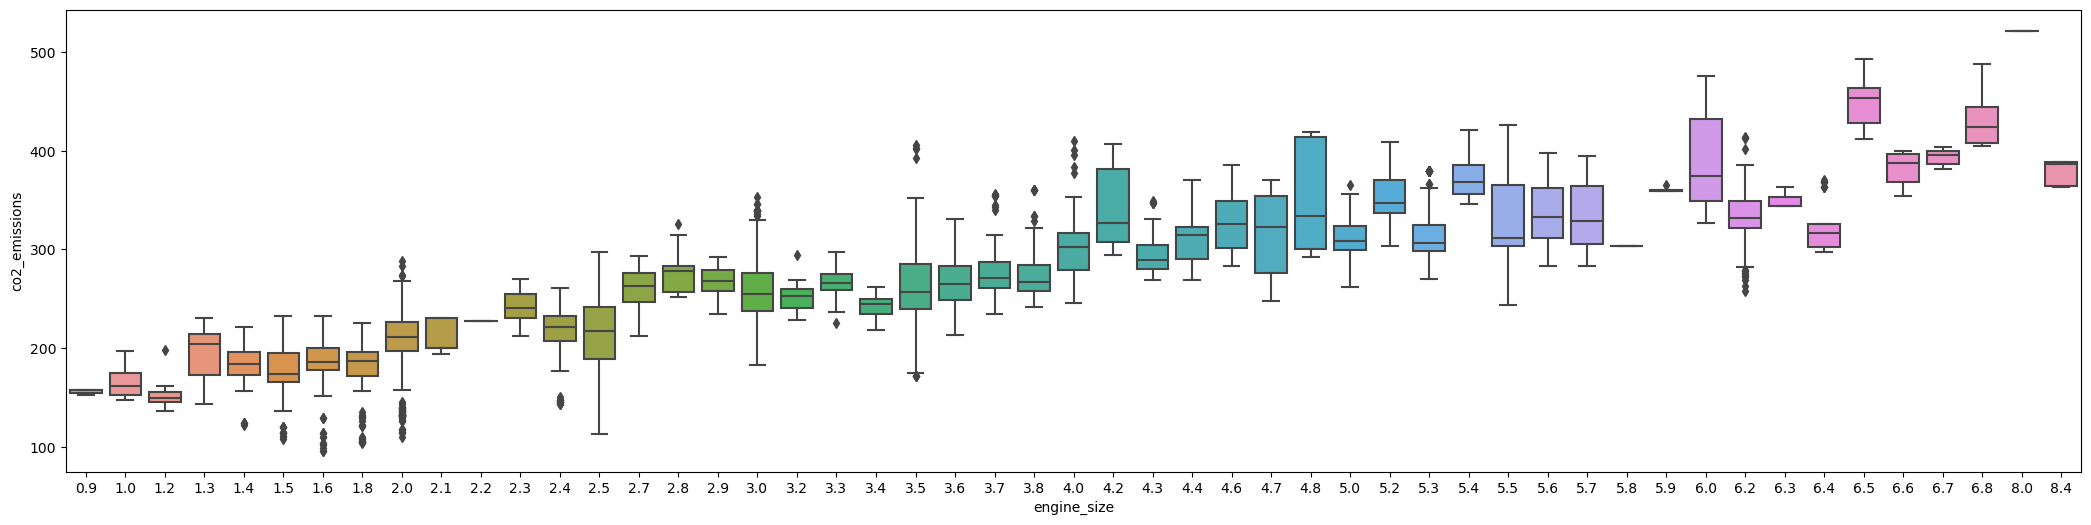

In [15]:
plt.figure(figsize=(26,6))
sns.boxplot(x='engine_size',y='co2_emissions',data=co_e)


<Axes: ylabel='engine_size'>

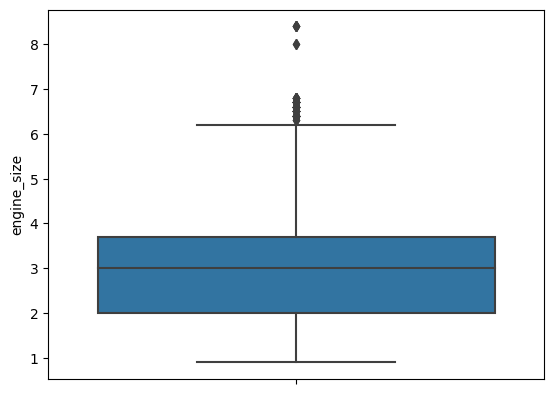

In [16]:
sns.boxplot(y='engine_size',data=co_e,order=co_e['engine_size'].value_counts().index)

<Axes: xlabel='Count', ylabel='cylinders'>

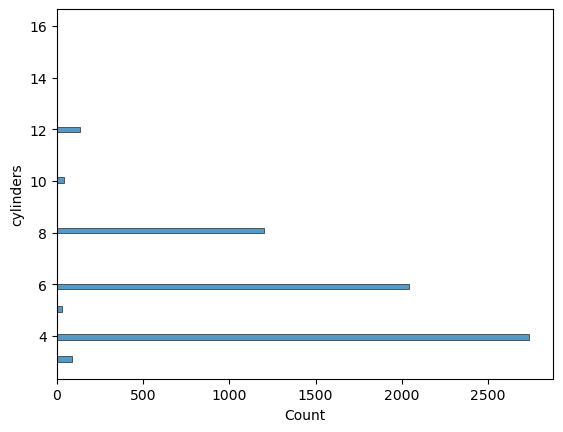

In [17]:
sns.histplot(y='cylinders',data=co_e)

<Axes: xlabel='Count', ylabel='transmission'>

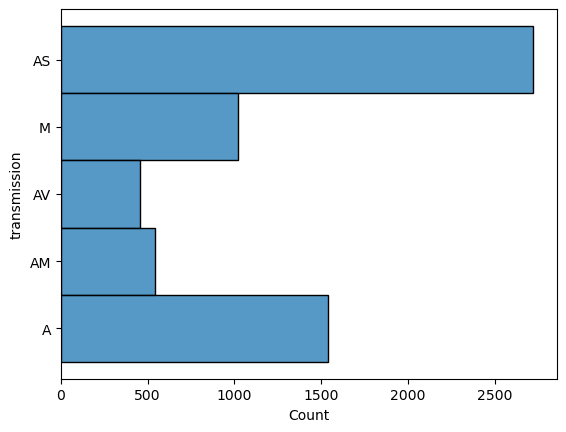

In [18]:
sns.histplot(y='transmission',data=co_e)

<Axes: xlabel='Count', ylabel='fuel_type'>

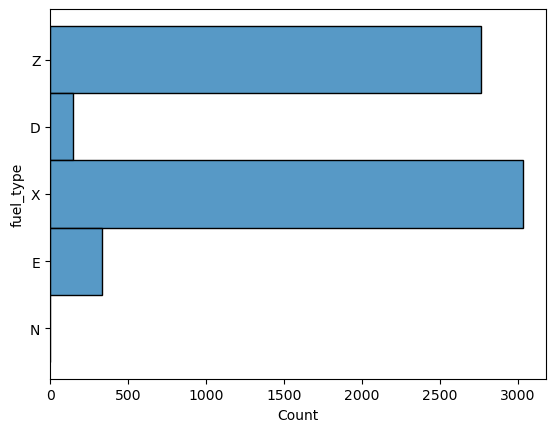

In [19]:
sns.histplot(y='fuel_type',data=co_e)

<Axes: xlabel='Count', ylabel='fuel_consumption_city'>

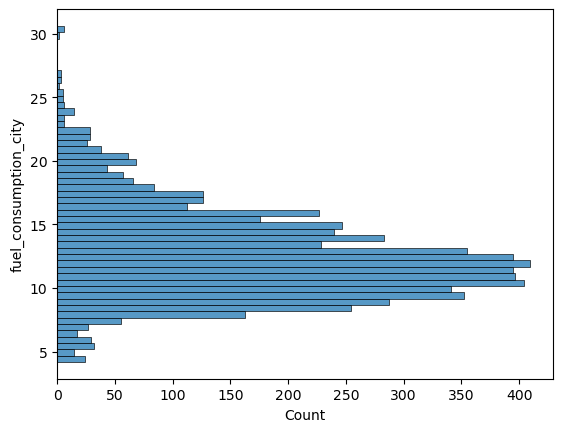

In [20]:
sns.histplot(y='fuel_consumption_city',data=co_e)

<Axes: xlabel='Count', ylabel='fuel_consumption_hwy'>

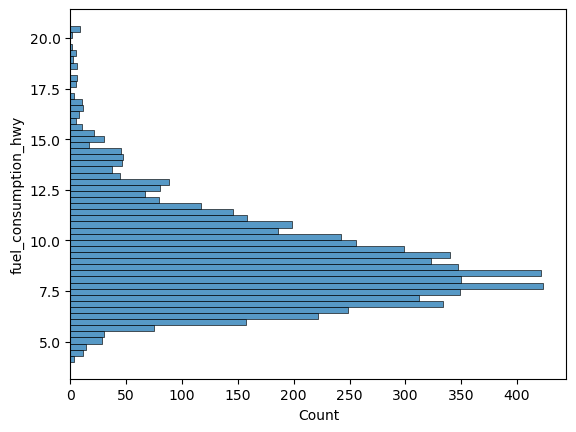

In [21]:
sns.histplot(y='fuel_consumption_hwy',data=co_e)

<Axes: xlabel='Count', ylabel='fuel_consumption_comb(l/100km)'>

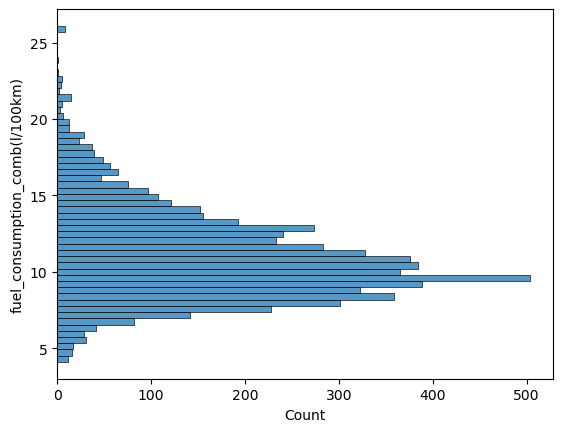

In [22]:
sns.histplot(y='fuel_consumption_comb(l/100km)',data=co_e)

<Axes: xlabel='Count', ylabel='fuel_consumption_comb(mpg)'>

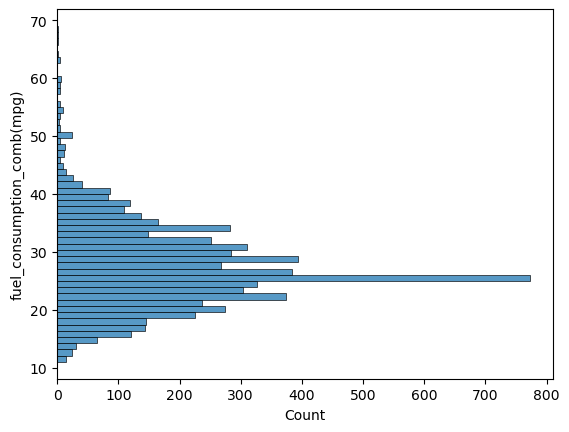

In [23]:
sns.histplot(y='fuel_consumption_comb(mpg)',data=co_e)

<Axes: xlabel='Count', ylabel='engine_size'>

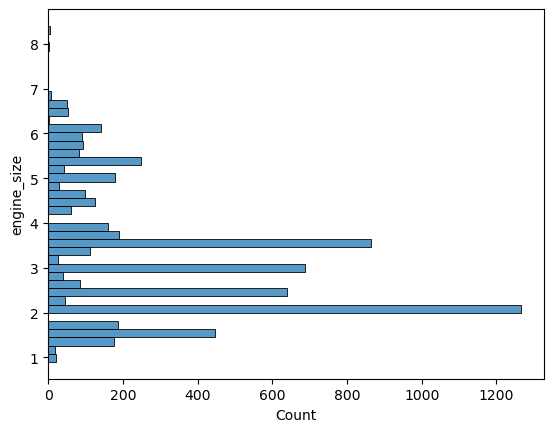

In [24]:
sns.histplot(y='engine_size',data=co_e)

<Axes: xlabel='make', ylabel='Count'>

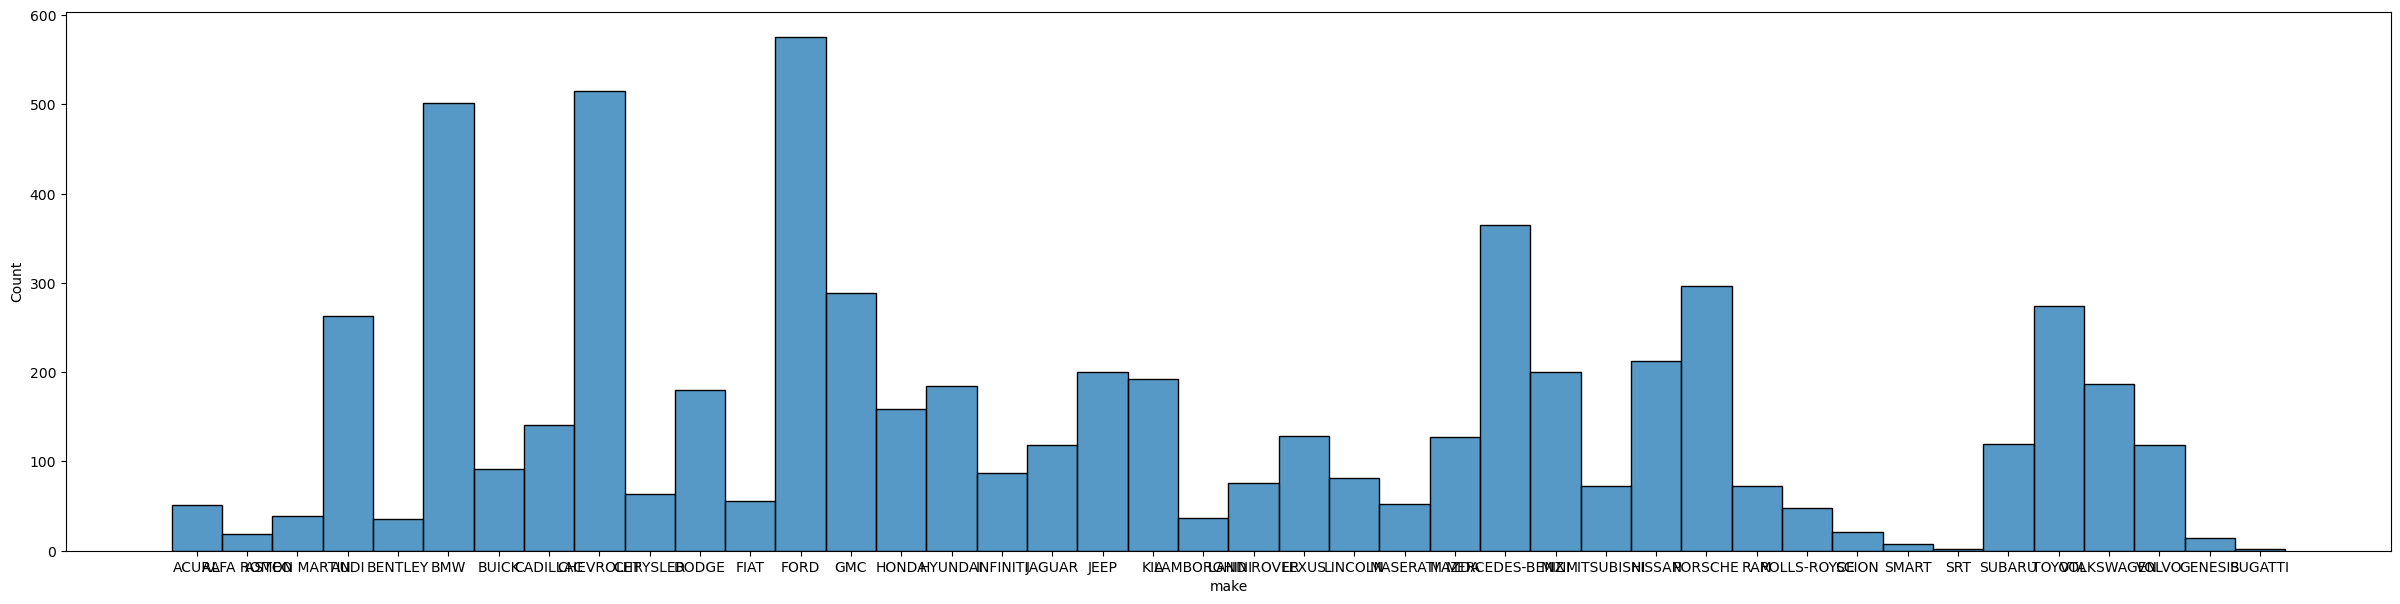

In [25]:
plt.figure(figsize=(30,7))
sns.histplot(x='make',data=co_e)

<Axes: xlabel='co2_emissions', ylabel='Density'>

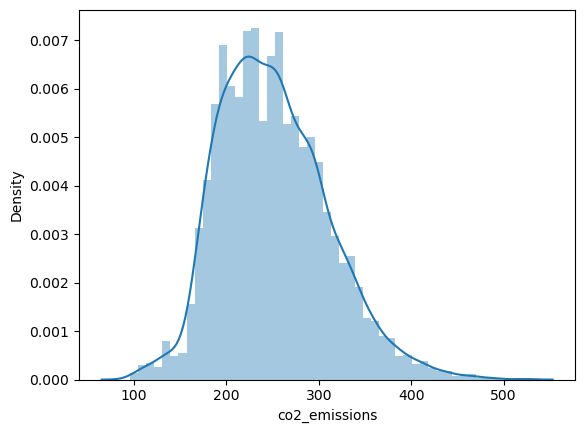

In [26]:
sns.distplot(co_e['co2_emissions'])

<Axes: >

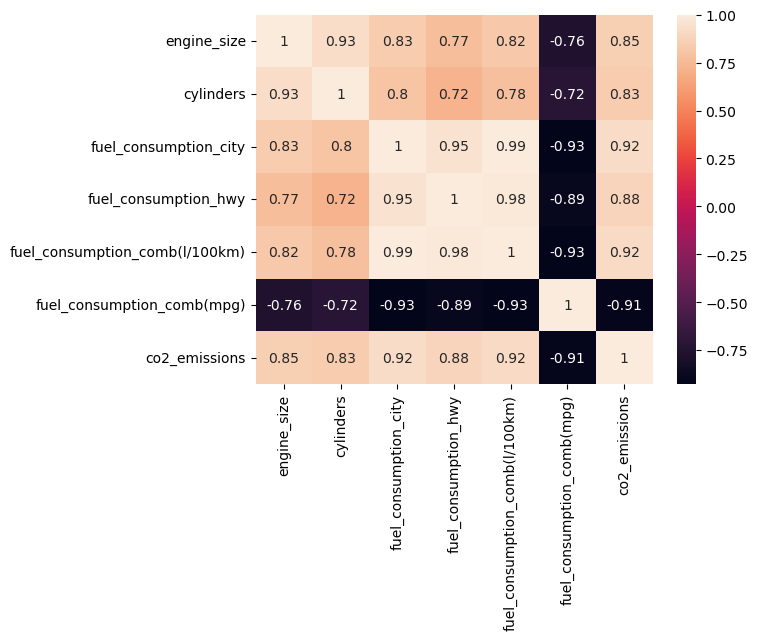

In [27]:
sns.heatmap(data=co_e.corr(),annot=True)

In [28]:
co_e['model']=co_e['model'].astype(str)

In [29]:
cols=['make','vehicle_class','transmission','fuel_type','model']
co_e[cols]=co_e[cols].apply(LabelEncoder().fit_transform)

In [30]:
co_e.head(7)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,0,1057,0,2.0,4,2,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,4,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,3,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,2,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,2,4,12.1,8.7,10.6,27,244
5,0,1510,2,3.5,6,2,4,11.9,7.7,10.0,28,230
6,0,1778,2,3.5,6,2,4,11.8,8.1,10.1,28,232


In [31]:
co_e=co_e.rename({'fuel_consumption_comb(l/100km)':'fuel_consumption_comb','fuel_consumption_comb(mpg)':'fuel_consumption_comb_mpg'},axis=1)

In [32]:
co_e.head(1)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,0,1057,0,2.0,4,2,4,9.9,6.7,8.5,33,196


### Normalizing data

In [33]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [34]:
norm_co=norm_func(co_e.iloc[:,0:])

In [35]:
norm_co.tail()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
7380,1.0,0.950780,0.733333,0.146667,0.076923,0.5,1.0,0.246212,0.222892,0.240909,0.327586,0.288732
7381,1.0,0.953704,0.733333,0.146667,0.076923,0.5,1.0,0.265152,0.259036,0.263636,0.310345,0.319249
7382,1.0,0.955166,0.733333,0.146667,0.076923,0.5,1.0,0.284091,0.277108,0.281818,0.275862,0.338028
7383,1.0,0.959064,0.800000,0.146667,0.076923,0.5,1.0,0.265152,0.259036,0.263636,0.310345,0.319249
7384,1.0,0.959552,0.800000,0.146667,0.076923,0.5,1.0,0.303030,0.283133,0.300000,0.258621,0.356808


## Feature Engineering

In [36]:
x= ppscore.matrix(co_e)

In [37]:
x.head(21)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,make,make,1.000000,predict_itself,True,None,0.00000,1.000000,None
1,make,model,0.217540,regression,True,mean absolute error,497.45260,389.236812,DecisionTreeRegressor()
2,make,vehicle_class,0.119033,regression,True,mean absolute error,4.47600,3.943208,DecisionTreeRegressor()
3,make,engine_size,0.232006,regression,True,mean absolute error,1.08338,0.832029,DecisionTreeRegressor()
4,make,cylinders,0.275862,regression,True,mean absolute error,1.45800,1.055793,DecisionTreeRegressor()
5,make,transmission,0.195333,regression,True,mean absolute error,0.97520,0.784711,DecisionTreeRegressor()
6,make,fuel_type,0.353355,regression,True,mean absolute error,0.61380,0.396911,DecisionTreeRegressor()
7,make,fuel_consumption_city,0.219715,regression,True,mean absolute error,2.72118,2.123297,DecisionTreeRegressor()
8,make,fuel_consumption_hwy,0.181014,regression,True,mean absolute error,1.71720,1.406362,DecisionTreeRegressor()
9,make,fuel_consumption_comb,0.209632,regression,True,mean absolute error,2.25166,1.779639,DecisionTreeRegressor()


In [38]:
x.head(52)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,make,make,1.000000,predict_itself,True,None,0.00000,1.000000,None
1,make,model,0.217540,regression,True,mean absolute error,497.45260,389.236812,DecisionTreeRegressor()
2,make,vehicle_class,0.119033,regression,True,mean absolute error,4.47600,3.943208,DecisionTreeRegressor()
3,make,engine_size,0.232006,regression,True,mean absolute error,1.08338,0.832029,DecisionTreeRegressor()
4,make,cylinders,0.275862,regression,True,mean absolute error,1.45800,1.055793,DecisionTreeRegressor()
5,make,transmission,0.195333,regression,True,mean absolute error,0.97520,0.784711,DecisionTreeRegressor()
6,make,fuel_type,0.353355,regression,True,mean absolute error,0.61380,0.396911,DecisionTreeRegressor()
7,make,fuel_consumption_city,0.219715,regression,True,mean absolute error,2.72118,2.123297,DecisionTreeRegressor()
8,make,fuel_consumption_hwy,0.181014,regression,True,mean absolute error,1.71720,1.406362,DecisionTreeRegressor()
9,make,fuel_consumption_comb,0.209632,regression,True,mean absolute error,2.25166,1.779639,DecisionTreeRegressor()


In [39]:
x.head(96)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,make,make,1.000000,predict_itself,True,None,0.00000,1.000000,None
1,make,model,0.217540,regression,True,mean absolute error,497.45260,389.236812,DecisionTreeRegressor()
2,make,vehicle_class,0.119033,regression,True,mean absolute error,4.47600,3.943208,DecisionTreeRegressor()
3,make,engine_size,0.232006,regression,True,mean absolute error,1.08338,0.832029,DecisionTreeRegressor()
4,make,cylinders,0.275862,regression,True,mean absolute error,1.45800,1.055793,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
91,fuel_consumption_city,fuel_consumption_city,1.000000,predict_itself,True,None,0.00000,1.000000,None
92,fuel_consumption_city,fuel_consumption_hwy,0.699601,regression,True,mean absolute error,1.71720,0.515846,DecisionTreeRegressor()
93,fuel_consumption_city,fuel_consumption_comb,0.895887,regression,True,mean absolute error,2.25166,0.234427,DecisionTreeRegressor()
94,fuel_consumption_city,fuel_consumption_comb_mpg,0.888431,regression,True,mean absolute error,5.51720,0.615549,DecisionTreeRegressor()


In [40]:
array= norm_co.values

In [41]:
z=array[:,0:11]

In [42]:
b=array[:,11]

In [43]:
test= SelectKBest(score_func=f_regression,k=9)

In [44]:
fit= test.fit(z,b)

In [45]:
print(fit.scores_)

[  148.23974507    85.23048096   624.64021391 17043.27062898
 14406.24508758   753.3162645     54.80623433 33849.07994382
 22228.31315245 32965.85725676 29030.05593185]


In [46]:
rfe = RFE(DecisionTreeRegressor())
fit= rfe.fit(z,b)

In [47]:
fit.n_features_

5

In [48]:
fit.support_

array([False, False, False,  True, False, False,  True,  True, False,
        True,  True])

## Model Building

#### Regession Model

In [49]:
model=smf.ols('co2_emissions~model+engine_size+fuel_consumption_comb+fuel_consumption_comb_mpg+cylinders',data=norm_co).fit()

In [50]:
model.params

Intercept                    0.328473
model                        0.006336
engine_size                  0.092458
fuel_consumption_comb        0.284451
fuel_consumption_comb_mpg   -0.449901
cylinders                    0.211201
dtype: float64

In [51]:
model.pvalues

Intercept                     0.000000e+00
model                         1.404457e-03
engine_size                   9.044518e-25
fuel_consumption_comb        9.777998e-112
fuel_consumption_comb_mpg    6.998289e-289
cylinders                     9.483116e-87
dtype: float64

In [52]:
(model.rsquared,model.rsquared_adj)

(0.9015765073983222, 0.9014979821927999)

In [53]:
model.tvalues

Intercept                    49.186715
model                         3.195161
engine_size                  10.319807
fuel_consumption_comb        22.922668
fuel_consumption_comb_mpg   -38.323021
cylinders                    20.053300
dtype: float64

### Calculating VIF

In [54]:
rsqu_transmission = smf.ols('transmission~fuel_consumption_city+fuel_consumption_hwy+fuel_consumption_comb+vehicle_class+engine_size+cylinders',data=co_e).fit().rsquared
vif_transmission=1/(1-rsqu_transmission)

In [55]:
rsqu_fuel_consumption_city=smf.ols('fuel_consumption_city~fuel_consumption_hwy+transmission+fuel_consumption_comb+vehicle_class+engine_size+cylinders',data=co_e).fit().rsquared
vif_fuel_consumption_city=1/(1-rsqu_fuel_consumption_city)

In [56]:
rsqu_fuel_consumption_hwy=smf.ols('fuel_consumption_hwy~transmission+fuel_consumption_comb+fuel_consumption_city+vehicle_class+engine_size+cylinders',data=co_e).fit().rsquared
vif_fuel_consumption_hwy=1/(1-rsqu_fuel_consumption_hwy)

In [57]:
rsqu_fuel_consumption_comb=smf.ols('fuel_consumption_comb~transmission+fuel_consumption_city+fuel_consumption_hwy+vehicle_class+engine_size+cylinders+fuel_consumption_comb_mpg',data=co_e).fit().rsquared
vif_fuel_consumption_comb=1/(1-rsqu_fuel_consumption_comb)

In [58]:
rsqu_vehicle_class=smf.ols('vehicle_class~fuel_consumption_hwy+fuel_consumption_city+transmission+fuel_consumption_comb+engine_size+cylinders+fuel_consumption_comb_mpg',data=co_e).fit().rsquared
vif_vehicle_class=1/(1-rsqu_vehicle_class)

In [59]:
rsqu_cylinders=smf.ols('cylinders~vehicle_class+fuel_consumption_city+fuel_consumption_hwy+fuel_consumption_comb+engine_size+transmission+fuel_consumption_comb_mpg',data=co_e).fit().rsquared
vif_cylinders=1/(1-rsqu_cylinders)

In [60]:
rsqu_engine_size=smf.ols('engine_size~vehicle_class+fuel_consumption_comb+fuel_consumption_city+fuel_consumption_hwy+transmission+cylinders+fuel_consumption_comb_mpg',data=co_e).fit().rsquared
vif_engine_size=1/(1-rsqu_engine_size)

In [61]:
rsqu_fuel_consumption_comb_mpg=smf.ols('fuel_consumption_comb_mpg~engine_size+fuel_consumption_city+fuel_consumption_hwy+cylinders+transmission+fuel_consumption_comb+vehicle_class',data=co_e).fit().rsquared
vif_fuel_consumption_comb_mpg=1/(1-rsqu_fuel_consumption_comb_mpg)

In [62]:
d1={'variables':['transmission','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb','vehicle_class','cylinders','engine_size','fuel_consumption_comb_mpg'],
    'vif':[vif_transmission,vif_fuel_consumption_city,vif_fuel_consumption_hwy,vif_fuel_consumption_comb,vif_vehicle_class,vif_cylinders,vif_engine_size,vif_fuel_consumption_comb_mpg]}
vif_frame=pd.DataFrame(d1)

In [63]:
vif_frame

,variables,vif
0,transmission,1.162226
1,fuel_consumption_city,2222.077651
2,fuel_consumption_hwy,623.732310
3,fuel_consumption_comb,5039.559693
4,vehicle_class,1.226703
5,cylinders,7.757698
6,engine_size,8.844497
7,fuel_consumption_comb_mpg,7.420228


In [64]:
final_model=smf.ols('co2_emissions~transmission+vehicle_class+engine_size+fuel_consumption_city+cylinders+fuel_consumption_comb_mpg',data=norm_co).fit()
(final_model.rsquared,final_model.aic)

(0.904215870447485, -21651.566767931865)

In [65]:
final_model_1=smf.ols('co2_emissions~transmission+vehicle_class+engine_size+fuel_consumption_hwy+cylinders+fuel_consumption_comb_mpg',data=norm_co).fit()
(final_model_1.rsquared,final_model_1.aic)

(0.905512736898628, -21737.080087779985)

In [66]:
final_model_2=smf.ols('co2_emissions~transmission+vehicle_class+engine_size+fuel_consumption_comb+cylinders+fuel_consumption_comb_mpg',data=norm_co).fit()
(final_model_2.rsquared,final_model_2.aic)

(0.9056653145006771, -21747.21788704604)

As Fuel consumption city and fuel consumpution HWY and fuel consumpution comb has collinearity between them self so we have calculate VIF score of indepenent feature and selected fule consumpution comb as it has high R-squared value and low AIC value 

In [67]:
m_6=print(model.rsquared,model.rsquared_adj)

0.9015765073983222 0.9014979821927999


In [68]:
norm_co

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,0.0,0.515107,0.000000,0.146667,0.076923,0.50,1.0,0.215909,0.162651,0.200000,0.379310,0.234742
1,0.0,0.515107,0.000000,0.200000,0.076923,1.00,1.0,0.265152,0.222892,0.250000,0.310345,0.293427
2,0.0,0.515595,0.000000,0.080000,0.076923,0.75,1.0,0.068182,0.108434,0.081818,0.637931,0.093897
3,0.0,0.600877,0.733333,0.346667,0.230769,0.50,1.0,0.321970,0.307229,0.318182,0.241379,0.373239
4,0.0,0.730507,0.733333,0.346667,0.230769,0.50,1.0,0.299242,0.283133,0.295455,0.275862,0.347418
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,1.0,0.950780,0.733333,0.146667,0.076923,0.50,1.0,0.246212,0.222892,0.240909,0.327586,0.288732
7381,1.0,0.953704,0.733333,0.146667,0.076923,0.50,1.0,0.265152,0.259036,0.263636,0.310345,0.319249
7382,1.0,0.955166,0.733333,0.146667,0.076923,0.50,1.0,0.284091,0.277108,0.281818,0.275862,0.338028
7383,1.0,0.959064,0.800000,0.146667,0.076923,0.50,1.0,0.265152,0.259036,0.263636,0.310345,0.319249


In [69]:
norm_co=norm_co.drop(['make','vehicle_class','transmission','fuel_consumption_city','fuel_consumption_hwy'],axis=1)

In [70]:
norm_co

,model,engine_size,cylinders,fuel_type,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,0.515107,0.146667,0.076923,1.0,0.200000,0.379310,0.234742
1,0.515107,0.200000,0.076923,1.0,0.250000,0.310345,0.293427
2,0.515595,0.080000,0.076923,1.0,0.081818,0.637931,0.093897
3,0.600877,0.346667,0.230769,1.0,0.318182,0.241379,0.373239
4,0.730507,0.346667,0.230769,1.0,0.295455,0.275862,0.347418
...,...,...,...,...,...,...,...
7380,0.950780,0.146667,0.076923,1.0,0.240909,0.327586,0.288732
7381,0.953704,0.146667,0.076923,1.0,0.263636,0.310345,0.319249
7382,0.955166,0.146667,0.076923,1.0,0.281818,0.275862,0.338028
7383,0.959064,0.146667,0.076923,1.0,0.263636,0.310345,0.319249


In [71]:
X=norm_co.iloc[:,0:-1]

In [72]:
X

,model,engine_size,cylinders,fuel_type,fuel_consumption_comb,fuel_consumption_comb_mpg
0,0.515107,0.146667,0.076923,1.0,0.200000,0.379310
1,0.515107,0.200000,0.076923,1.0,0.250000,0.310345
2,0.515595,0.080000,0.076923,1.0,0.081818,0.637931
3,0.600877,0.346667,0.230769,1.0,0.318182,0.241379
4,0.730507,0.346667,0.230769,1.0,0.295455,0.275862
...,...,...,...,...,...,...
7380,0.950780,0.146667,0.076923,1.0,0.240909,0.327586
7381,0.953704,0.146667,0.076923,1.0,0.263636,0.310345
7382,0.955166,0.146667,0.076923,1.0,0.281818,0.275862
7383,0.959064,0.146667,0.076923,1.0,0.263636,0.310345


In [73]:
Y=norm_co.iloc[:,-1]

In [74]:
Y

0       0.234742
1       0.293427
2       0.093897
3       0.373239
4       0.347418
          ...   
7380    0.288732
7381    0.319249
7382    0.338028
7383    0.319249
7384    0.356808
Name: co2_emissions, Length: 6273, dtype: float64

In [75]:
data_norm=norm_co.rename({'fuel_consumption_comb(l/100km)':'fuel_consumption_comb','fuel_consumption_comb(mpg)':'fuel_consumption_comb_mpg'},axis=1)

In [76]:
norm_co

,model,engine_size,cylinders,fuel_type,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,0.515107,0.146667,0.076923,1.0,0.200000,0.379310,0.234742
1,0.515107,0.200000,0.076923,1.0,0.250000,0.310345,0.293427
2,0.515595,0.080000,0.076923,1.0,0.081818,0.637931,0.093897
3,0.600877,0.346667,0.230769,1.0,0.318182,0.241379,0.373239
4,0.730507,0.346667,0.230769,1.0,0.295455,0.275862,0.347418
...,...,...,...,...,...,...,...
7380,0.950780,0.146667,0.076923,1.0,0.240909,0.327586,0.288732
7381,0.953704,0.146667,0.076923,1.0,0.263636,0.310345,0.319249
7382,0.955166,0.146667,0.076923,1.0,0.281818,0.275862,0.338028
7383,0.959064,0.146667,0.076923,1.0,0.263636,0.310345,0.319249


In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [78]:
model_1 =DecisionTreeRegressor(max_depth=5)

In [79]:
model_1.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5)

In [80]:
m_1=model_1.score(X_test,Y_test)

In [81]:
m_1

0.9853250291971714

In [82]:
model_1.score(X_train,Y_train)

0.9829032521013834

### Model Adaboost

In [83]:
model_2=AdaBoostRegressor(n_estimators=10,random_state=10)

In [84]:
model_2.fit(X_train,Y_train)

AdaBoostRegressor(n_estimators=10, random_state=10)

In [85]:
m_2=model_2.score(X_test,Y_test)

In [86]:
m_2

0.9248219591723059

In [87]:
model_2.score(X_train,Y_train)

0.931390789514736

### RandomFOrest

In [88]:
model_3=RandomForestRegressor(max_depth=3,random_state=10)

In [89]:
model_3.fit(X_train,Y_train)

RandomForestRegressor(max_depth=3, random_state=10)

In [90]:
m_3=model_3.score(X_test,Y_test)

In [91]:
m_3

0.9156394419912515

In [92]:
model_3.score(X_train,Y_train)

0.9153261001424456

### Model Granient Boosting

In [93]:
model_4=GradientBoostingRegressor(max_depth=3,random_state=10)

In [94]:
model_4.fit(X_train,Y_train)

GradientBoostingRegressor(random_state=10)

In [95]:
m_4=model_4.score(X_test,Y_test)

In [96]:
m_4

0.996696213740989

In [97]:
model_4.score(X_train,Y_train)

0.9969472663496378

### K Neighbous Model

In [98]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

In [99]:
model_n=KNeighborsRegressor()
grid=GridSearchCV(estimator=model_n,param_grid=param_grid)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [100]:
print(grid.best_score_)
print(grid.best_params_)

0.9905451267975713
{'n_neighbors': 1}


In [101]:
model_5=KNeighborsRegressor(n_neighbors=1)
model_5.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=1)

In [102]:
m_5=model_5.score(X_test,Y_test)

In [103]:
m_5

0.9903997235245521

In [104]:
model_5.score(X_train,Y_train)

0.9992406940503402

In [105]:
df={"models":["model_decisiontree_regressor","model_adaboost_regressor","model_random forest_regressor","model_gradient_boost_regressor","model_kNN","model_regression"],"accuracys":[m_1,m_2,m_3,m_4,m_5,90]}


In [106]:
frame= pd.DataFrame(df)

### Accuracies of all Model

In [107]:
frame

,models,accuracys
0,model_decisiontree_regressor,0.985325
1,model_adaboost_regressor,0.924822
2,model_random forest_regressor,0.915639
3,model_gradient_boost_regressor,0.996696
4,model_kNN,0.990400
5,model_regression,90.000000


## Hence We Have Selected K_NN Model For Deployment